# Imports


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# getting the path of the file
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ecommerce-customers/Ecommerce Customers.csv


In [2]:
# ignore warning for the distplot, which is deprecated, but allows for a better viz of the histogram and kde line

import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading the dataset

ecomm = pd.read_csv('/kaggle/input/ecommerce-customers/Ecommerce Customers.csv')
ecomm.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### Description of each column, according to the dataset source

* **Avg. Session Length**: Average session of in-store style advice sessions.
* **Time on App**: Average time spent on App in minutes
* **Time on Website**: Average time spent on Website in minutes
* **Length of Membership**: How many years the customer has been a member.

# Laying out the main ideas:
* Explore the dataset (EDA)
* Preprocessing and modeling
* Testing and evaluating the models
* Conclusion (insights)
* **Bonus**: Clustering with K-Means 

# Exploratory Data Analysis (EDA)

In [4]:
ecomm.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 141.1 KB


In [5]:
# data types are OK. Confirming that there are no null values:

ecomm.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [6]:
ecomm.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [7]:
# dropping the 'Avatar' column

ecomm = ecomm.drop('Avatar', axis=1)

# checking the 'Address' columns, it looks like some records do not have the state available

ecomm.Address.str.split(',',expand=True).sample(10)

,0,1
312,093 Larson Ports\nWest Kathryn,OK 91243
446,57993 Jennifer Unions Suite 685\nEmilyville,OK 53366-2375
391,14064 Frazier Hills Apt. 176\nAmyborough,MP 77858-0018
180,047 Carla Locks\nCoreymouth,AR 98066
182,5183 Michael Ramp\nEast Lukeburgh,FL 93972
301,Unit 7029 Box 3429\nDPO AE 56975,None
161,94730 Martin Mount\nNew Matthew,VI 08142-6708
148,811 Maria Run\nSanchezville,MI 04953
364,2595 James Creek Apt. 571\nMillerberg,HI 82236
483,768 Riley Pine Apt. 624\nKellymouth,OK 98992-3108


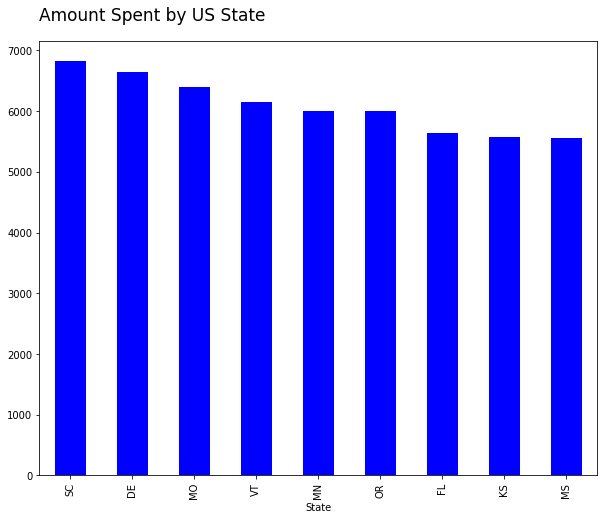

In [8]:
# plotting for columns that have, for illustrative purposes only

ecomm['State'] = ecomm.Address.str.split(',', expand=True)[1].str.split(' ', expand=True)[1]
ecomm = ecomm[['Email', 'Address', 'State', 'Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']] # rearranging columns
plt.figure(figsize=(10,8))
ecomm.groupby('State').sum()['Yearly Amount Spent'].sort_values(ascending=False)[1:10].plot(kind='bar', color='blue');
plt.title('Amount Spent by US State', loc='Left', fontsize=17, pad=20);

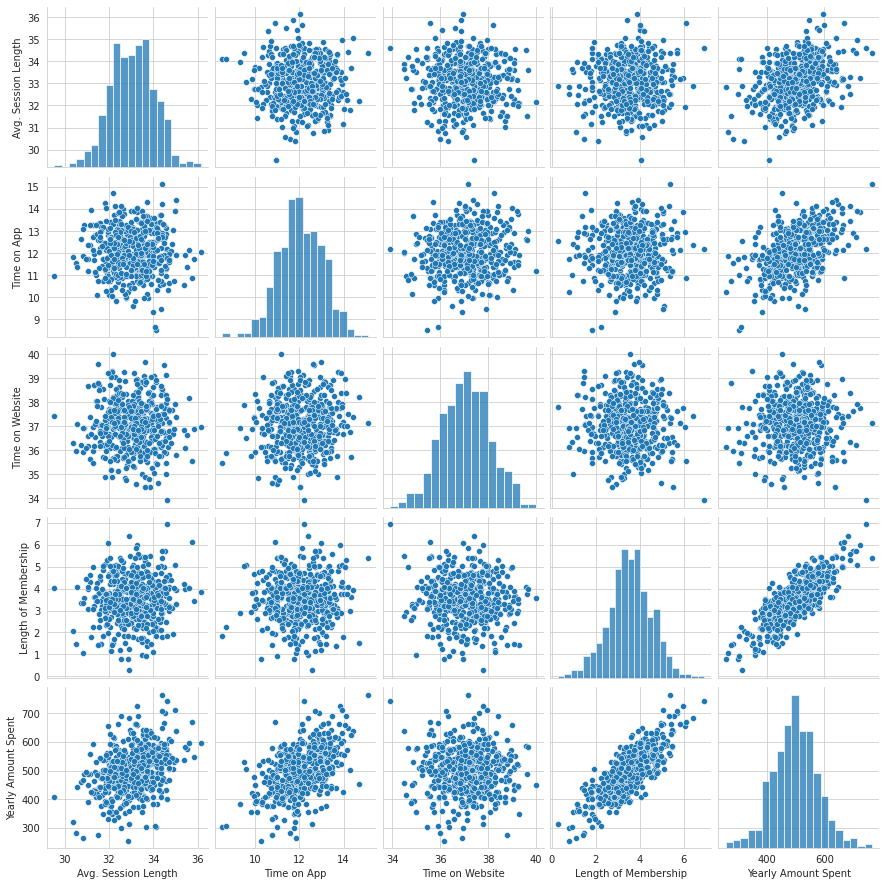

In [9]:
# relationships across the dataset

sns.set_style('whitegrid')
sns.pairplot(ecomm);

# side note: the dataset is already normally distributed (good sign for the regression analysis)
# length of membership seems to have the highest correlationw with the amount spent. Time on app apparently comes second.

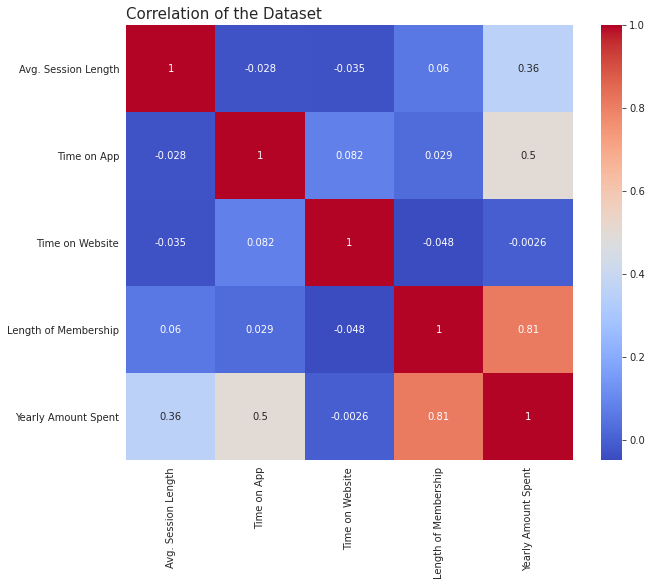

In [10]:
# heatmap for corr analysis

plt.figure(figsize=(10, 8))
sns.heatmap(ecomm.corr(),annot=True, cmap='coolwarm');
plt.title('Correlation of the Dataset', loc='left', fontsize=15);

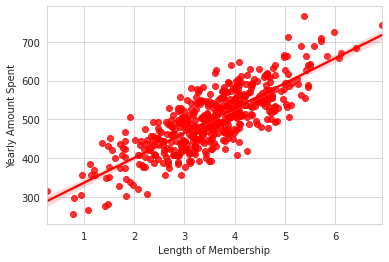

In [11]:
# length of membership vs. yearly amount spent

sns.regplot(data=ecomm, x='Length of Membership', y='Yearly Amount Spent', color='r');

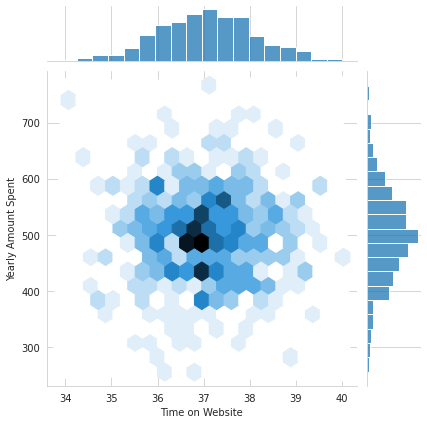

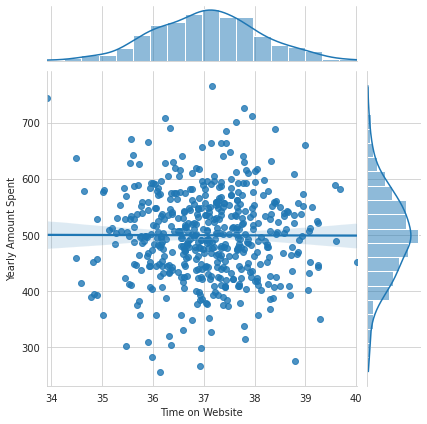

In [12]:
# yearly amount spent vs time on website

sns.set_style('whitegrid')
sns.jointplot(x=ecomm['Time on Website'], y=ecomm['Yearly Amount Spent'], kind='hex');

# the lack of a strong relationship between the variables is quite apparent

sns.jointplot(kind='reg',x=ecomm['Time on Website'], y=ecomm['Yearly Amount Spent']);

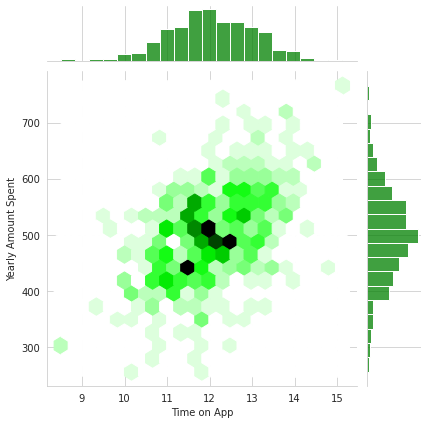

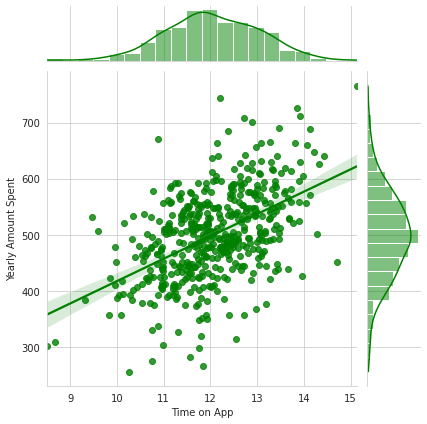

In [13]:
# yearly amount spent vs time on app

sns.jointplot(x=ecomm['Time on App'], y=ecomm['Yearly Amount Spent'], color='g', kind='hex');

# much stronger correlation

sns.jointplot(kind='reg',x=ecomm['Time on App'], y=ecomm['Yearly Amount Spent'], color='g');

# Preprocessing and Modeling

In [14]:
from sklearn.model_selection import train_test_split

X = ecomm[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = ecomm['Yearly Amount Spent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [15]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

# printing the coefficients and score

print(f'Coefficients: {reg.coef_}. \nScore: {reg.score(X_train, y_train)}.')

Coefficients: [25.58114975 38.68497549  0.28143353 61.52898383]. 
Score: 0.9853809622249996.


# Predicting and Evaluating the Linear Model

In [16]:
# calculating the metrics - I'll use the MAE, MSE, RMSE. And also print the explained variance score (R^2) again, just so they're together.

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
predictions = reg.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
rsqrt = explained_variance_score(y_test, predictions)

print('MAE: {} \nMSE: {} \nRMSE: {} \nR-squared: {}'.format(mae, mse, rmse, rsqrt))

# the model explains approx. 98% of the variance, which is extremely accurate

MAE: 8.369606825327736 
MSE: 109.49458741778832 
RMSE: 10.463966141850246 
R-squared: 0.9816582166888989


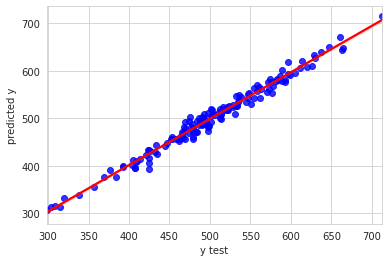

In [17]:
reg.predict(X_test)

ax = sns.regplot(x=y_test, y=reg.predict(X_test),
                scatter_kws={'color': 'blue'}, line_kws={'color':'red'});
ax.set(xlabel='y test', ylabel='predicted y');

In [18]:
# sample of predicted vs. actual amount spent

samp = pd.DataFrame({'Prediction': predictions, 'Actual': y_test}, index=None)
samp.sample(10)

,Prediction,Actual
67,478.344076,469.310861
10,508.237999,492.606013
281,564.864337,560.443792
75,455.628330,478.719357
83,337.437591,338.319863
160,492.088759,468.913501
56,523.362325,520.898794
179,504.604974,501.100245
63,470.308725,483.159721
209,455.984167,468.668466


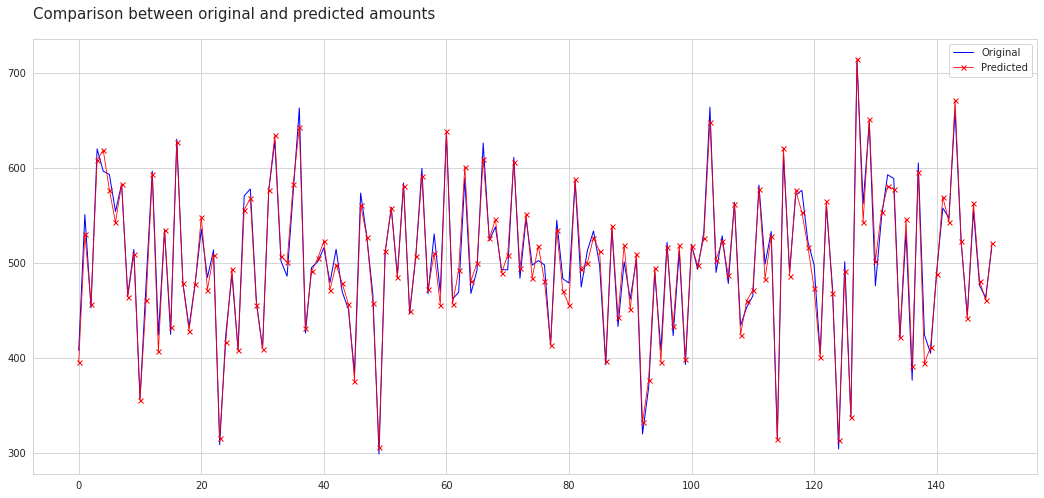

In [19]:
x_ax = range(len(X_test))
plt.figure(figsize=(18,8))
plt.plot(x_ax, y_test, lw=1, color='blue',label="Original")
plt.plot(x_ax, predictions, lw=0.8, color='red', label = "Predicted", marker="x", markersize=5)
plt.legend()
plt.title('Comparison between original and predicted amounts', loc='left', fontsize=15, pad=20);

# Residuals


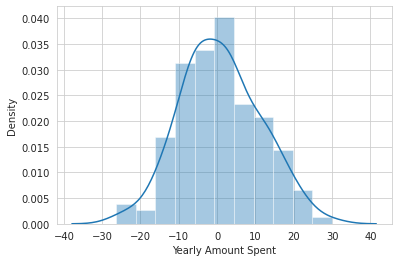

In [20]:
sns.distplot(y_test - predictions);

# Conclusion and Insights of the Linear Model

In [21]:
coeff = pd.DataFrame(index=X.columns, columns=['Coefficients'], data=reg.coef_)
coeff

,Coefficients
Avg. Session Length,25.581150
Time on App,38.684975
Time on Website,0.281434
Length of Membership,61.528984


### Insights:

* Based on the coefficients, it is possible to predict - with a 98% accuracy, approx. - that, with all other features fixed, to **each unit increase in the time spent on app, there is a USD 38.10 increase in the 'Yearly Amount Spent'**.
* Considering that it would be significantly more difficult to increase the **'Avg Session Length'** (and it may even lead to a worse customer experience) and that the **'Length of Membership'** cannot be directly stimulated (only by focusing on customer service and retention) and only grows with time, **the company should focus on**:
##### * Further developing their mobile application, which should lead to an increase in the time customers spend on it.
##### * Creating a survey and performing a root cause analysis to better understand how to improve the website experience and why it is not leading to sales as well as their mobile app.

# Bonus: Clustering with K-Means

* The idea is to **find the best number of clusters** and separate them in a way that would allow for a different strategy to target each one.

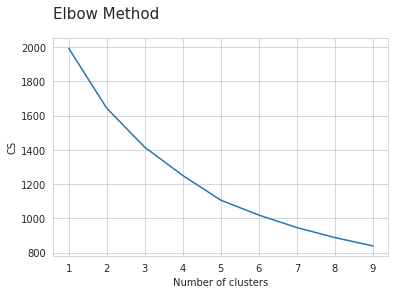

In [22]:
from sklearn.cluster import KMeans
clus = X

# elbow method

c = []
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++')
    km.fit(clus)
    c.append(km.inertia_)
plt.plot(range(1, 10), c);
plt.title('Elbow Method', loc='left', fontsize=15, pad=20);
plt.xlabel('Number of clusters');
plt.ylabel('CS');

In [23]:
# trying out with 5 different clusters

km = KMeans(n_clusters=5)
clus['Cluster'] = km.fit_predict(clus)
clus['Cluster'] = clus['Cluster'].astype('category')
clus.head(10)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Cluster
0,34.497268,12.655651,39.577668,4.082621,0
1,31.926272,11.109461,37.268959,2.664034,1
2,33.000915,11.330278,37.110597,4.104543,3
3,34.305557,13.717514,36.721283,3.120179,0
4,33.330673,12.795189,37.536653,4.446308,0
5,33.871038,12.026925,34.476878,5.493507,2
6,32.021596,11.366348,36.683776,4.685017,4
7,32.739143,12.351959,37.373359,4.434273,4
8,33.987773,13.386235,37.534497,3.273434,0
9,31.936549,11.814128,37.145168,3.202806,4


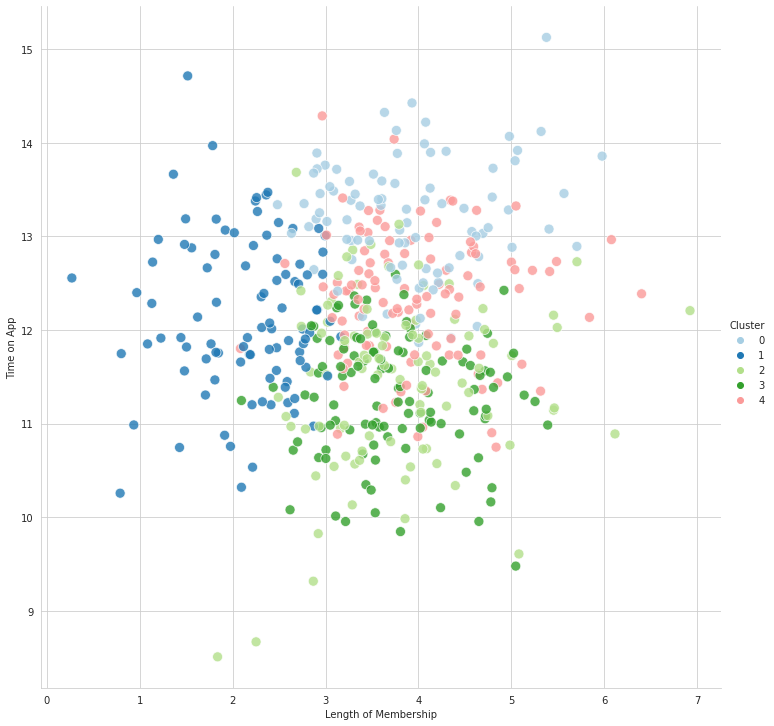

In [24]:
sns.relplot(x='Length of Membership', y='Time on App', hue='Cluster', data=clus, 
            height=10, alpha=.8, s=100, palette='Paired');

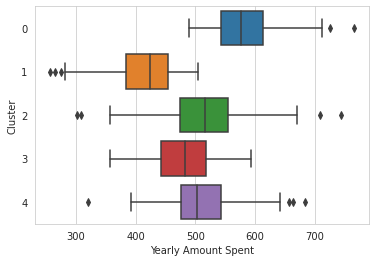

In [25]:
clus['Yearly Amount Spent'] = ecomm['Yearly Amount Spent']
sns.boxplot(x='Yearly Amount Spent', y='Cluster', data=clus);

##### That is it for this one. Thank you for reading! :)
If there's anything you believe could be improved, please, leave a comment. :)